# Analiza podatkov

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_excel("data_cleaned.xlsx")
#df = df.drop(df.columns[5], axis=1)# to je zelo slaba koda
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df = df.apply(pd.to_numeric, errors='coerce')

In [4]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Unnamed: 58,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,3,4,3,2,3,3,0,0,0,9,27,26,25,21,23
1,2,1,1,2,2,1,1,1,0,9,29,28,26,24,25


<Axes: xlabel='Anksioznost'>

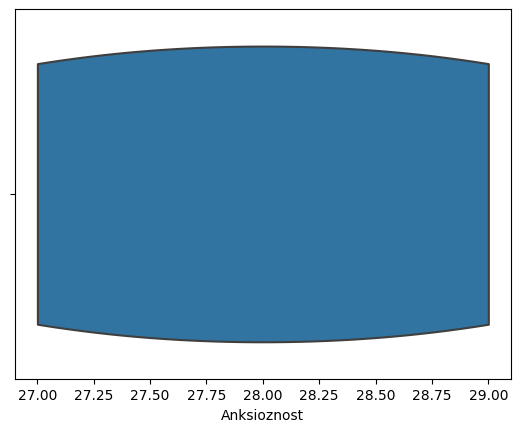

In [5]:
import seaborn as sns

sns.violinplot(x=df["Anksioznost"], cut=0, inner="stick")

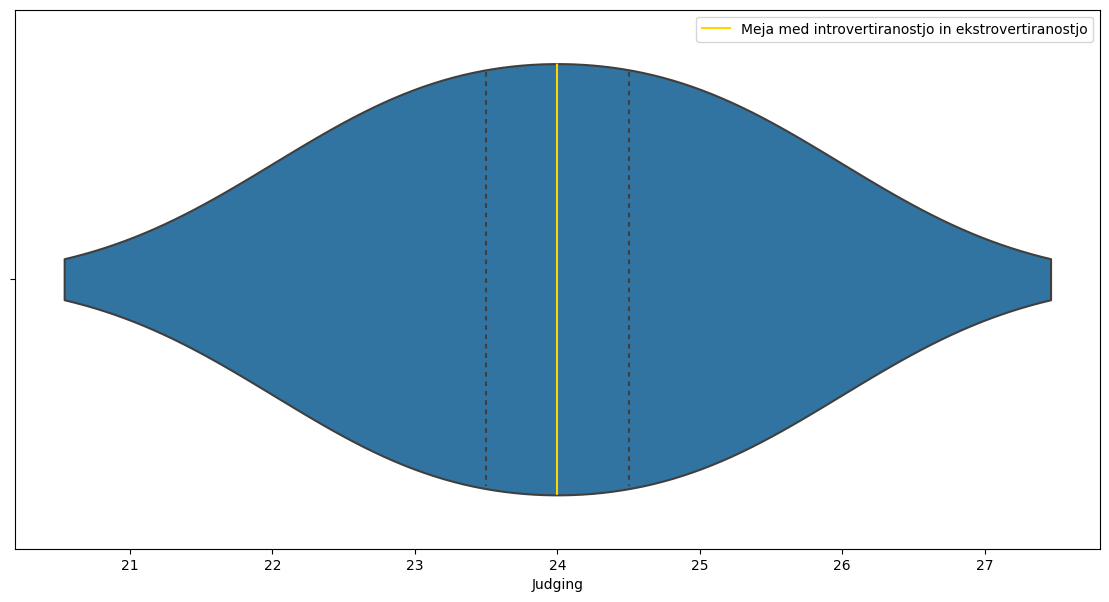

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))

ax = sns.violinplot(x=df["Judging"], inner="quart")

# where quantile should be actually drawn
line24 = ax.axvline(x=24, color="gold", label="Meja med introvertiranostjo in ekstrovertiranostjo")
patch = PathPatch(ax.collections[0].get_paths()[0], transform=ax.transData)
line24.set_clip_path(patch) # clip the line by the form of the violin

ax.legend()
plt.show()

In [7]:
df.describe(include='all')

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Unnamed: 58,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
count,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.00000,2.000000
mean,2.500000,2.50000,2.000000,2.0,2.500000,2.000000,0.500000,0.500000,0.0,9.0,28.000000,27.000000,25.500000,22.50000,24.000000
std,0.707107,2.12132,1.414214,0.0,0.707107,1.414214,0.707107,0.707107,0.0,0.0,1.414214,1.414214,0.707107,2.12132,1.414214
min,2.000000,1.00000,1.000000,2.0,2.000000,1.000000,0.000000,0.000000,0.0,9.0,27.000000,26.000000,25.000000,21.00000,23.000000
25%,2.250000,1.75000,1.500000,2.0,2.250000,1.500000,0.250000,0.250000,0.0,9.0,27.500000,26.500000,25.250000,21.75000,23.500000
50%,2.500000,2.50000,2.000000,2.0,2.500000,2.000000,0.500000,0.500000,0.0,9.0,28.000000,27.000000,25.500000,22.50000,24.000000
75%,2.750000,3.25000,2.500000,2.0,2.750000,2.500000,0.750000,0.750000,0.0,9.0,28.500000,27.500000,25.750000,23.25000,24.500000
max,3.000000,4.00000,3.000000,2.0,3.000000,3.000000,1.000000,1.000000,0.0,9.0,29.000000,28.000000,26.000000,24.00000,25.000000


In [8]:
df.head()

,Uspesnost,Ocena,Interakcija_kvantitativno,Interakcija_kvalitativno,Outperforming_partner,Unnamed: 58,Razred,Profesor,Spol,Motivacija,Anksioznost,Introvertiranost,Sensing,Feeling,Judging
0,3,4,3,2,3,3,0,0,0,9,27,26,25,21,23
1,2,1,1,2,2,1,1,1,0,9,29,28,26,24,25


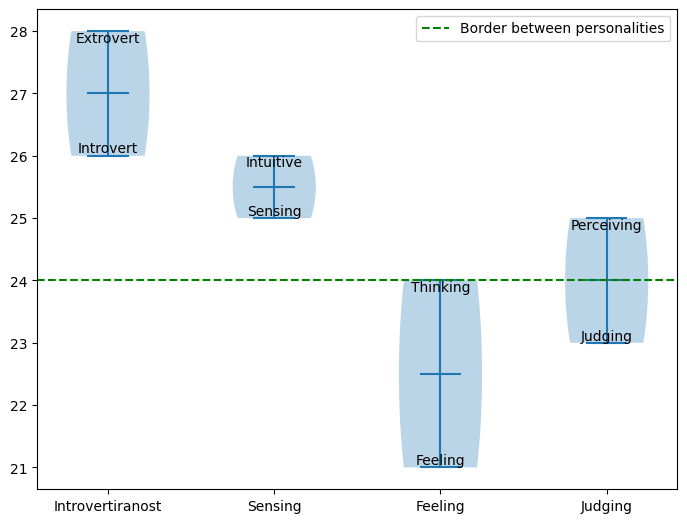

In [20]:
fig = plt.figure()

data_to_plot = [df["Introvertiranost"], df["Sensing"], df["Feeling"], df["Judging"]]

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
positions = [1, 2, 3, 4]
bp = ax.violinplot(data_to_plot, positions=positions, showmedians=True)

plt.axhline(y=24, color ="green", linestyle ="--", label="Border between personalities")

plt.xticks(positions, ['Introvertiranost', 'Sensing', 'Feeling', "Judging"])

# Define personalized labels for each violin plot
top_labels = ["Introvert", "Sensing", "Feeling", "Judging"]
bottom_labels = ["Extrovert", "Intuitive", "Thinking", "Perceiving"]

# Add text labels to the top and bottom of each violin plot
for i, data in enumerate(data_to_plot):
    min_value = min(data)
    max_value = max(data)
    ax.text(positions[i], min_value, top_labels[i], ha='center', va='bottom')
    ax.text(positions[i], max_value, bottom_labels[i], ha='center', va='top')

    
ax.legend()

plt.show()

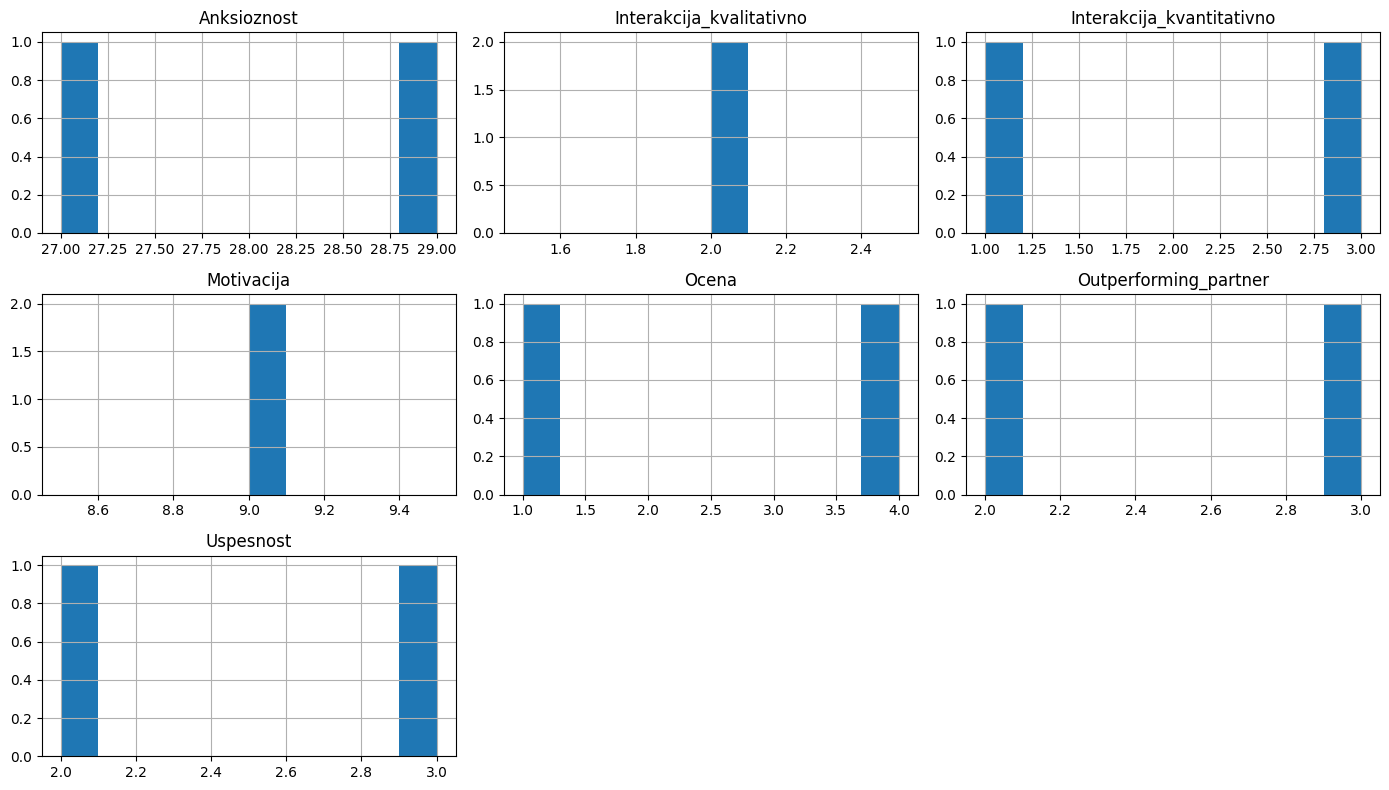

In [10]:
"""exclude = ['Unnamed: 58','Introvertiranost','Judging','Sensing', "Feeling", "Spol", "Profesor", "Razred"]
df.loc[:, df.columns.difference(exclude)].hist(figsize=(14,8))
plt.tight_layout()
plt.show()"""

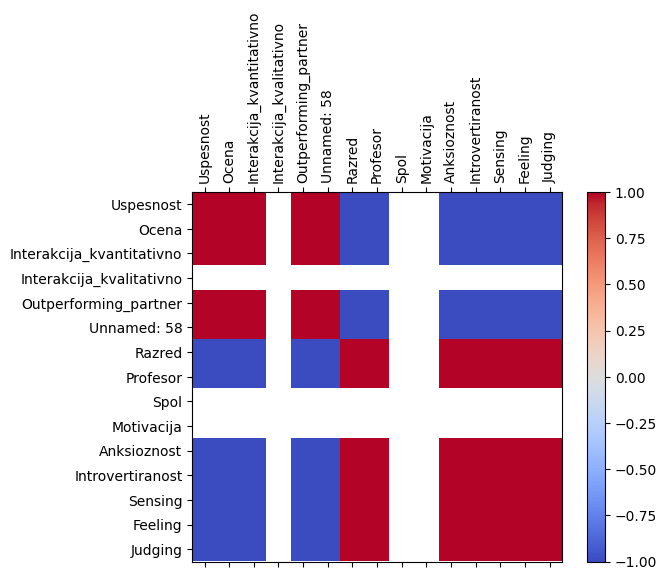

In [11]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

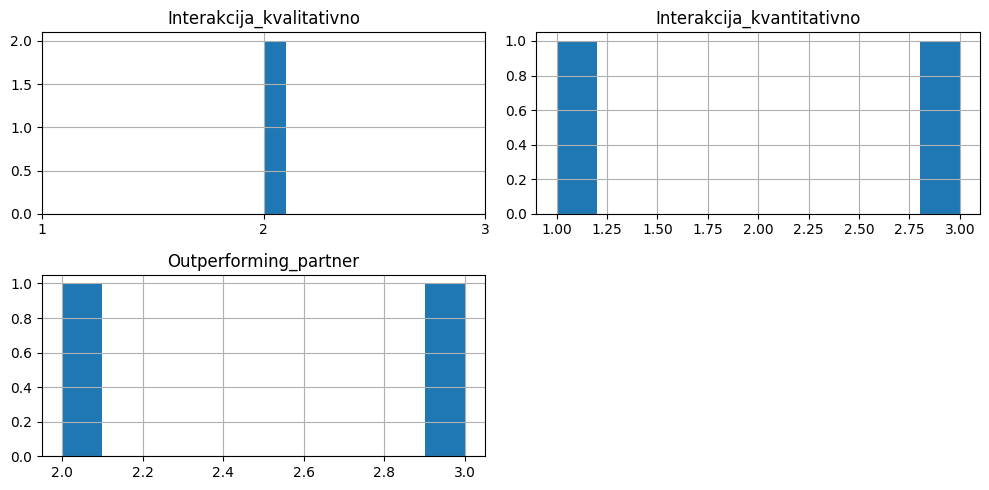

In [22]:
include = ['Interakcija_kvalitativno', 'Interakcija_kvantitativno', 'Outperforming_partner']  # Specify the columns you want to include in the histogram

ax = df[include].hist(figsize=(10, 5))

# Set the x-axis ticks to 1, 2, and 3
ax[0][0].set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

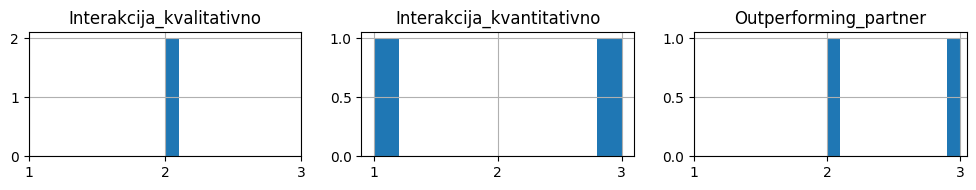

In [26]:
import matplotlib.pyplot as plt

include = ['Interakcija_kvalitativno', 'Interakcija_kvantitativno', 'Outperforming_partner']  # Specify the columns you want to include in the histogram

fig, axes = plt.subplots(1, len(include), figsize=(10, 2))  # Create a single row of subplots

for i, column in enumerate(include):
    df[column].hist(ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xticks([1, 2, 3])

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


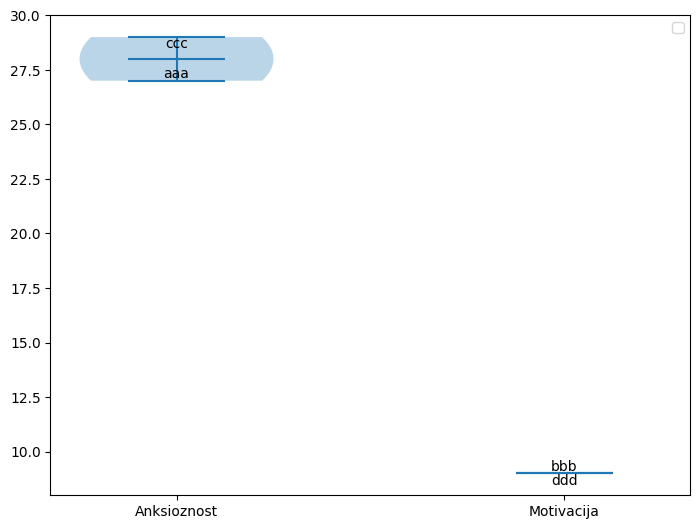

In [31]:
fig = plt.figure()

data_to_plot = [df["Anksioznost"], df["Motivacija"]]

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
positions = [1, 2]
bp = ax.violinplot(data_to_plot, positions=positions, showmedians=True)

#plt.axhline(y=24, color ="green", linestyle ="--", label="Border between personalities")

plt.xticks(positions, ['Anksioznost', 'Motivacija'])

# Define personalized labels for each violin plot
top_labels = ["aaa", "bbb"]
bottom_labels = ["ccc", "ddd"]

# Add text labels to the top and bottom of each violin plot
for i, data in enumerate(data_to_plot):
    min_value = min(data)
    max_value = max(data)
    ax.text(positions[i], min_value, top_labels[i], ha='center', va='bottom')
    ax.text(positions[i], max_value, bottom_labels[i], ha='center', va='top')

    
ax.legend()

plt.show()